In [114]:
import os, json
import pandas as pd
from pandas.io.json import json_normalize
import glob
path_to_json = 'C:/Users/srika/Downloads/altmetric_clean_sample/altmetric_clean_sample/'
folders=[]
for i in os.listdir(path_to_json):
    folders.append('C:/Users/srika/Downloads/altmetric_clean_sample/altmetric_clean_sample/' + i)
jf=[]
for i in folders:
    allFiles = glob.glob(i + "/*.json")
    for j in allFiles:
        jf.append(j)
data=[]
for index, js in enumerate(jf):
    with open(os.path.join(path_to_json, js)) as json_file:
        json_text = json.load(json_file)
        data.append(json_text)

In [115]:
len(data)

100000

In [189]:
df=pd.DataFrame()
df['Altmertic Id']=pd.Series([data[i]['altmetric_id'] for i in range(len(data))])
df.head()

,Altmertic Id
0,100080
1,100163
2,100180
3,100181
4,100206


In [190]:
import numpy as np
cols=['twitter', 'facebook', 'googleplus', 'reddit', 'blogs', 'peer_reviews', 'news', 'f1000']
for j in cols:
    l=[]
    for i in range(len(data)):
        try:
            l.append(data[i]['counts'][j]['posts_count'])
        except KeyError:
            l.append(0)
    df[j]=pd.Series(l, index=df.index)
df.head()

,Altmertic Id,twitter,facebook,googleplus,reddit,blogs,peer_reviews,news,f1000
0,100080,5,2,0,0,17,0,9,0
1,100163,4,1,0,1,2,0,2,0
2,100180,0,0,0,0,1,0,0,0
3,100181,0,1,0,0,1,0,0,0
4,100206,0,0,0,0,1,0,0,0


In [191]:
data[99759]['posts'].keys()

dict_keys(['twitter', 'facebook', 'policy'])

In [192]:
y=[]
count=0
for i in range(len(data)):
    try:
        x=data[i]['posts']['video'][0]['url']
        if 'youtube' in x:
            y.append(1)
        else:
            y.append(0)
    except KeyError:
        y.append(0)
    except TypeError:
        y.append(0)
df['Youtube']=pd.Series(y, index=df.index)

In [193]:
df.head()

,Altmertic Id,twitter,facebook,googleplus,reddit,blogs,peer_reviews,news,f1000,Youtube
0,100080,5,2,0,0,17,0,9,0,1
1,100163,4,1,0,1,2,0,2,0,0
2,100180,0,0,0,0,1,0,0,0,0
3,100181,0,1,0,0,1,0,0,0,0
4,100206,0,0,0,0,1,0,0,0,0


In [194]:
l=[]
for i in range(len(data)):
    try:
        l.append(data[i]['counts']['readers']['mendeley'])
    except KeyError:
        l.append(0)
df['Mendeley']=pd.Series(l, index=df.index)
df.head()

,Altmertic Id,twitter,facebook,googleplus,reddit,blogs,peer_reviews,news,f1000,Youtube,Mendeley
0,100080,5,2,0,0,17,0,9,0,1,133
1,100163,4,1,0,1,2,0,2,0,0,193
2,100180,0,0,0,0,1,0,0,0,0,104
3,100181,0,1,0,0,1,0,0,0,0,11
4,100206,0,0,0,0,1,0,0,0,0,0


In [195]:
l=[]
for i in range(len(data)):
    try:
        l.append(data[i]['altmetric_score']['score'])
    except KeyError:
        l.append(0)
df['Altmetrics_score']=pd.Series(l, index=df.index)
df.head()

,Altmertic Id,twitter,facebook,googleplus,reddit,blogs,peer_reviews,news,f1000,Youtube,Mendeley,Altmetrics_score
0,100080,5,2,0,0,17,0,9,0,1,133,155.080
1,100163,4,1,0,1,2,0,2,0,0,193,40.376
2,100180,0,0,0,0,1,0,0,0,0,104,5.048
3,100181,0,1,0,0,1,0,0,0,0,11,5.626
4,100206,0,0,0,0,1,0,0,0,0,0,5.048


j=[]
for i in range(len(data)):
    try:
        j.append(data[i]['citation']['publisher'])
    except KeyError:
        j.append(np.nan)
df['publisher']=pd.Series(j, index=df.index)
df.head()

In [196]:
count=0
for i in range(len(data)):
    try:
        if 'video' in data[i]['posts'].keys():
            print(data[i]['altmetric_id'], data[i]['posts']['video'][0]['url'])
            count+=1
    except AttributeError:
        continue
count 

100080 https://www.youtube.com/watch?v=t2Q2T6jQlY0
100638 https://www.youtube.com/watch?v=hKwh1IbplKE
103123 https://www.youtube.com/watch?v=6dFxu6hrEKk
104169 https://www.youtube.com/watch?v=AeWnL0Fa_kg
1011451 https://www.youtube.com/watch?v=klRfruVtuvA
1019162 https://www.youtube.com/watch?v=-Kxv9fd6E3w
1033051 https://www.youtube.com/watch?v=h5gro9Gg9oQ
1036322 https://www.youtube.com/watch?v=dr-QaeY7AUA
10313512 https://www.youtube.com/watch?v=z6f9vo4Pr44
1058783 https://www.youtube.com/watch?v=6cZN1PmNKH4
1058916 https://www.youtube.com/watch?v=nEpfS780kQ8
10519446 https://www.youtube.com/watch?v=x1ZWrus6qHQ
10519449 https://www.youtube.com/watch?v=x1ZWrus6qHQ
10519456 https://www.youtube.com/watch?v=iToXSqKh9Jc
1065753 https://www.youtube.com/watch?v=UqQKBcGNsxE
1069081 https://www.youtube.com/watch?v=wb9SF4VZDQA
1075421 https://www.youtube.com/watch?v=zr5o0bp2Lg8
1077177 https://www.youtube.com/watch?v=1tlf_ejwqi8
10734040 https://www.youtube.com/watch?v=MQYOsy_AC_U
10794258 ht

867934 https://www.youtube.com/watch?v=YUS-eqXSSZo
8679642 https://www.youtube.com/watch?v=eaznFJJXVLk
871701 https://www.youtube.com/watch?v=JhFeNpmug_k
874279 https://www.youtube.com/watch?v=6RMnWQePecg
8701710 https://www.youtube.com/watch?v=4oSM8e2ozIs
8702070 https://www.youtube.com/watch?v=c5UMOX7_eqM
8702635 https://www.youtube.com/watch?v=JfxqEJ2-OCQ
8727802 https://www.youtube.com/watch?v=EmOeO0jA36w
8729266 https://www.youtube.com/watch?v=-h2xWLbXkT8
8758660 https://www.youtube.com/watch?v=u8u4_lXHdW8
889500 https://www.youtube.com/watch?v=PCA83XEn7Rw
8816968 https://www.youtube.com/watch?v=0YUUj3Qkm5I
8946828 https://www.youtube.com/watch?v=gOgiTAUGRd4
9004034 https://www.youtube.com/watch?v=MKkjTY4Q1Tk
9011254 https://www.youtube.com/watch?v=HhSYZlE7JI0
9034511 https://www.youtube.com/watch?v=2VNRfYShYIA
910751 https://www.youtube.com/watch?v=CoxKOgZ2INg
9110293 https://www.youtube.com/watch?v=h0AvGpED86w
9159144 https://www.youtube.com/watch?v=HPe9nvIcPRI
9236176 https://w

616

In [197]:
import matplotlib.pyplot as plt

0    99384
1      616
Name: Youtube, dtype: int64

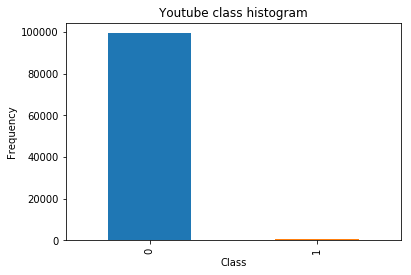

In [198]:
pd.value_counts(df['Youtube']).plot.bar()
plt.title('Youtube class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
df['Youtube'].value_counts()

# The data is highly imbalanced,  just 616 papers were posted in youtube out of 100,000 samples

# Using KNN as classifier - look at recall value 

In [199]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [200]:
X=np.array(df.drop(['Youtube','Altmertic Id'], axis=1).values)
y=np.array(df['Youtube'].values)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [201]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
y_train_pre = knn.predict(X_train)
cnf_mat_tra = confusion_matrix(y_train, y_train_pre)

In [202]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[69560     9]
 [  379    52]]


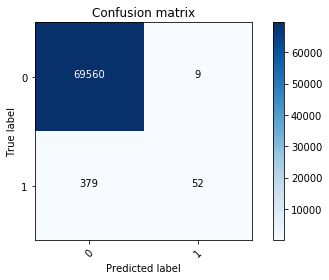

In [203]:
# confusion matrix for the training data
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_mat_tra , classes=class_names, title='Confusion matrix')
plt.show()

In [204]:
y_pred = knn.predict(X_test)
conf_mat=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[29810     5]
 [  172    13]]
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     29815
          1       0.72      0.07      0.13       185

avg / total       0.99      0.99      0.99     30000



the recall value is 0.07 - too low, caused by the imbalance data

Confusion matrix, without normalization
[[29810     5]
 [  172    13]]


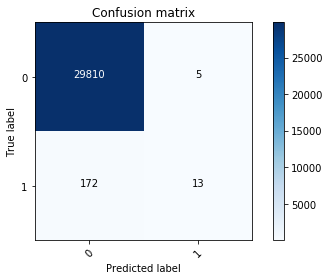

In [205]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(conf_mat , classes=class_names, title='Confusion matrix')
plt.show()

# Using  SMOTE for this imbalanced data

In [206]:
from sklearn.preprocessing import StandardScaler

In [207]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

In [208]:
sm = SMOTE(random_state=2)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (70000, 10)
Number transactions y_train dataset:  (70000,)
Number transactions X_test dataset:  (30000, 10)
Number transactions y_test dataset:  (30000,)


In [209]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 431
Before OverSampling, counts of label '0': 69569 



In [210]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

After OverSampling, the shape of train_X: (139138, 10)
After OverSampling, the shape of train_y: (139138,) 



In [211]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, counts of label '1': 69569
After OverSampling, counts of label '0': 69569


In [212]:
from sklearn.model_selection import GridSearchCV

In [213]:
parameters = {'C': np.linspace(1, 10, 10)}
logreg=LogisticRegression()
clf = GridSearchCV(logreg, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train_res, y_train_res.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    8.0s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:   25.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [217]:
clf.best_params_['C']

6.0

In [218]:
lr = LogisticRegression(C=clf.best_params_['C'],penalty='l1', verbose=5)
lr.fit(X_train_res, y_train_res.ravel())

[LibLinear]

LogisticRegression(C=6.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=5, warm_start=False)

In [219]:
y_train_pre = lr.predict(X_train)
cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)

In [220]:
print(confusion_matrix(y_train, y_train_pre))
print(classification_report(y_train, y_train_pre))

[[61830  7739]
 [  223   208]]
             precision    recall  f1-score   support

          0       1.00      0.89      0.94     69569
          1       0.03      0.48      0.05       431

avg / total       0.99      0.89      0.93     70000



Confusion matrix, without normalization
[[61830  7739]
 [  223   208]]


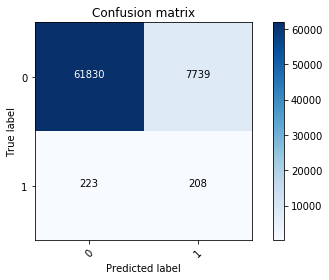

In [221]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

             precision    recall  f1-score   support

          0       1.00      0.89      0.94     29815
          1       0.03      0.49      0.05       185

avg / total       0.99      0.89      0.93     30000

Confusion matrix, without normalization
[[26486  3329]
 [   94    91]]


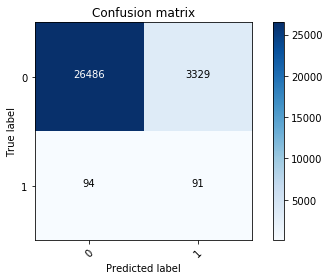

In [222]:
y_pred = lr.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names = [0,1]
print(classification_report(y_test, y_pred))
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [223]:
print("Recall metric in the testing dataset: {}".format(cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))


Recall metric in the testing dataset: 0.4918918918918919


# Recall value - 0.49 (using KNN the recall value is 0.03)

[LibLinear]

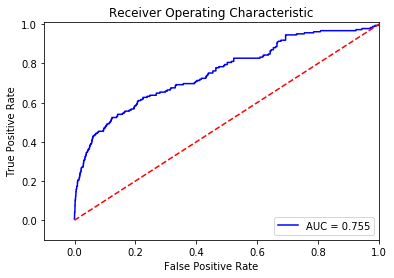

In [224]:
tmp = lr.fit(X_train_res, y_train_res.ravel())
y_pred_sample_score = tmp.decision_function(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [225]:
roc_auc

0.7552991193440631

# Using SVM as calssifier

In [22]:
from sklearn import svm
from sklearn import metrics

In [ ]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train,y_train)

In [ ]:
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [164]:
data[2].keys()

dict_keys(['altmetric_id', 'counts', 'citation', 'altmetric_score', 'demographics', 'posts'])

In [173]:
data[2]['citation']

{'abstract': 'Discovering that drug entities already approved for one disease are effective treatments for other distinct diseases can be highly beneficial and cost effective. To do this predictively, our conjecture is that a semantic infrastructure linking mechanistic relationships between pharmacologic entities and multidimensional knowledge of biological systems and disease processes will be highly enabling.',
 'abstract_source': 'pubmed',
 'altmetric_jid': '4f6fa4d03cf058f6100007a9',
 'authors': ['Xiaoyan A Qu',
  'Ranga C Gudivada',
  'Anil G Jegga',
  'Eric K Neumann',
  'Bruce J Aronow'],
 'doi': '10.1186/1471-2105-10-s5-s4',
 'issns': ['1471-2105'],
 'journal': 'BMC Bioinformatics',
 'last_mentioned_on': 1300738560,
 'links': ['http://www.ncbi.nlm.nih.gov/pubmed/19426461'],
 'pmid': '19426461',
 'pubdate': '2009-01-01T00:00:00+00:00',
 'publisher': 'BioMed Central',
 'publisher_subjects': [{'name': 'Biological Sciences', 'scheme': 'era'},
  {'name': 'Information And Computing S

In [167]:
data[2]['citation']['publisher']

'BioMed Central'

In [172]:
j=[]
for i in range(len(data)):
    try:
        if data[i]['citation']['publisher'] not in j:
            j.append(data[i]['citation']['publisher'])
    except KeyError:
        continue
len(j)

7741